# <font color='red'>Notas de matemática do ENEM 2016</font>

## Desafio Codenation 

###### Por: Marcus Rosa Godoi

# Problema de Negócio: Criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016.


# 0.0 - IMPORTS

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error        
                           
from sklearn.model_selection import train_test_split                 #MANIPULAÇÃO DOS DADOS
from sklearn.preprocessing import LabelEncoder, OneHotEncoder        #MANIPULAÇÃO DOS DADOS
from sklearn.preprocessing import MinMaxScaler                       #MANIPULAÇÃO DOS DADOS
from sklearn.preprocessing import StandardScaler                     #MANIPULAÇÃO DOS DADOS
from scipy.stats import boxcox                                       #MANIPULAÇÃO DOS DADOS
from sklearn.preprocessing import PolynomialFeatures                 #MANIPULAÇÃO DOS DADOS

from sklearn.model_selection import cross_val_score, learning_curve, validation_curve
from sklearn.ensemble import RandomForestRegressor                                          #MODELO
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.feature_selection import SelectKBest, f_regression # chi2 fnciona somene para classificação

import pickle #salvar modelo

# 1.0  - COLETAS DE DADOS

In [2]:
base_treino = pd.read_csv('Dados/train.csv')
base_teste = pd.read_csv('Dados/test.csv')

## 1.1 - Verificação da Base de Dados

 ### Base treino

In [3]:
print('Número de Linhas: {}'.format(base_treino.shape[0]))
print('Número de Colunas: {}'.format(base_treino.shape[1]))

Número de Linhas: 13730
Número de Colunas: 167


In [4]:
base_treino.dtypes

Unnamed: 0                  int64
NU_INSCRICAO               object
NU_ANO                      int64
CO_MUNICIPIO_RESIDENCIA     int64
NO_MUNICIPIO_RESIDENCIA    object
                            ...  
Q046                       object
Q047                       object
Q048                       object
Q049                       object
Q050                       object
Length: 167, dtype: object

In [5]:
base_treino.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [6]:
base_treino.describe()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.000000,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,...,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2288.173926,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,...,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,1321.230607,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,...,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,0.000000,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1144.000000,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000
50%,2288.000000,2016.0,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,3432.000000,2016.0,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,4586.000000,2016.0,5.300108e+06,53.000000,67.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


 ### Base teste

In [7]:
print('Número de Linhas: {}'.format(base_teste.shape[0]))
print('Número de Colunas: {}'.format(base_teste.shape[1]))

Número de Linhas: 4576
Número de Colunas: 47


In [8]:
base_teste.dtypes

NU_INSCRICAO               object
CO_UF_RESIDENCIA            int64
SG_UF_RESIDENCIA           object
NU_IDADE                    int64
TP_SEXO                    object
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
TP_DEPENDENCIA_ADM_ESC    float64
IN_BAIXA_VISAO              int64
IN_CEGUEIRA                 int64
IN_SURDEZ                   int64
IN_DISLEXIA                 int64
IN_DISCALCULIA              int64
IN_SABATISTA                int64
IN_GESTANTE                 int64
IN_IDOSO                    int64
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
CO_PROVA_CN                object
CO_PROVA_CH                object
CO_PROVA_LC                object
CO_PROVA_MT                object
NU_NOTA_CN                float64
NU_NOTA_CH    

In [9]:
base_teste.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [10]:
base_teste.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,1480.000000,4576.000000,1480.000000,...,3442.000000,3377.000000,4576.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000
mean,30.762019,21.542395,2.181163,1.060970,1.791084,2.119537,1.368663,1.182432,0.127404,2.264865,...,529.195264,514.304205,0.604458,1.095943,119.626888,111.915902,106.384365,112.881256,76.683447,527.491857
std,9.912313,6.854073,1.017531,0.281289,0.875692,3.210353,0.568589,0.572495,0.333461,0.716922,...,73.086665,67.725564,0.489020,0.695047,29.028146,33.296849,33.834492,33.202244,42.985637,151.979490
min,11.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,479.725000,468.400000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,532.000000,516.800000,1.000000,1.000000,120.000000,120.000000,100.000000,120.000000,80.000000,540.000000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,...,579.550000,562.400000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,53.000000,65.000000,5.000000,4.000000,4.000000,10.000000,3.000000,3.000000,1.000000,4.000000,...,773.600000,708.900000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000


# 2.0 - LIMPEZA DOS DADOS

In [11]:
base_treino2 = base_treino.copy()
base_teste2 = base_teste.copy() #copias dos dados

# 2.1 - Análise dos Aributos

## 2.1.1 - Listar Nomes das Colunas (Atributos)

In [12]:
# Lista todas as colunas
list(base_treino2)

['Unnamed: 0',
 'NU_INSCRICAO',
 'NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'SG_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR

In [13]:
# Lista todas as colunas
list(base_teste2)

['NU_INSCRICAO',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'TP_DEPENDENCIA_ADM_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q047']

## Igualar colunas Treino e Teste

In [14]:
base_treino21 = base_treino2[base_teste2.columns]
base_treino21['NU_NOTA_MT'] = base_treino2['NU_NOTA_MT']
base_treino21.shape

C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(13730, 48)

In [15]:
base_treino21

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,580.0,A,A,B,A,A,A,NaN,A,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,NaN,D,D,C,A,A,A,NaN,A,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,NaN,H,E,E,C,B,C,F,D,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,NaN,E,D,C,A,A,B,F,A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,aadf671ef8c1c6efa42e69432093ab83c17a52ac,35,SP,20,M,1,1,1,3,1,...,440.0,E,E,G,B,B,B,C,A,403.2
13726,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,26,PE,33,F,3,2,1,10,1,...,560.0,A,A,C,A,B,B,I,A,452.4
13727,5354503700ecf2388f68990435390b6e1ad454ee,43,RS,15,F,1,1,3,0,1,...,600.0,C,G,B,A,B,A,NaN,A,398.0
13728,c7a9e94a42bd76b7978f13c013a61702e36cc42c,33,RJ,36,M,3,1,4,0,1,...,460.0,B,D,G,B,B,C,E,A,386.6


In [16]:
list(base_treino21)

['NU_INSCRICAO',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'TP_DEPENDENCIA_ADM_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q047',
 'NU_NOTA_MT']

#### Como a base train possui muitas linhas inicialmente vamos trata-la como a base completa e dividi-la para treino e teste.
#### A base test será usada apenas para prever os novos valores, pois ela não possui a coluna NU_NOTA_MT (saída).

Verificar em cada variável o seu significado, relevância (para a sua saída):

1. tipo
2. Segmento (característica geral que influencia. Ex: localização (preço das casas)
3. Expectativa (importância)
4. Comentários 

In [17]:
#1 - Tipo
base_treino21.dtypes

NU_INSCRICAO               object
CO_UF_RESIDENCIA            int64
SG_UF_RESIDENCIA           object
NU_IDADE                    int64
TP_SEXO                    object
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
TP_DEPENDENCIA_ADM_ESC    float64
IN_BAIXA_VISAO              int64
IN_CEGUEIRA                 int64
IN_SURDEZ                   int64
IN_DISLEXIA                 int64
IN_DISCALCULIA              int64
IN_SABATISTA                int64
IN_GESTANTE                 int64
IN_IDOSO                    int64
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
CO_PROVA_CN                object
CO_PROVA_CH                object
CO_PROVA_LC                object
CO_PROVA_MT                object
NU_NOTA_CN                float64
NU_NOTA_CH    

Levantar hipóteses sobre as variáveis.

1. Questione as variáveis.
2. Sua importância e etc.
3. Avaliar hipóteses. (gráficos)

## 2.2 - Valores Missing

In [18]:
# Verificando se existem valores nulos na base de dados

total = base_treino21.isnull().sum().sort_values(ascending=False)
porcentagem = (base_treino21.isnull().sum()/base_treino21.isnull().count() * 100).sort_values(ascending=False)
missing = pd.concat([total, porcentagem], axis=1, keys=['Total', 'Porcentagem'])
missing.head(20)

,Total,Porcentagem
TP_DEPENDENCIA_ADM_ESC,9448,68.812819
TP_ENSINO,9448,68.812819
Q027,7373,53.699927
NU_NOTA_MT,3597,26.198106
NU_NOTA_COMP5,3597,26.198106
NU_NOTA_LC,3597,26.198106
TP_STATUS_REDACAO,3597,26.198106
NU_NOTA_COMP2,3597,26.198106
NU_NOTA_COMP3,3597,26.198106
NU_NOTA_COMP4,3597,26.198106


## 2.3 - Valores Missing Ocultos

## 2.4 - Tratando Dados Missing

In [19]:
missing.head(14)

,Total,Porcentagem
TP_DEPENDENCIA_ADM_ESC,9448,68.812819
TP_ENSINO,9448,68.812819
Q027,7373,53.699927
NU_NOTA_MT,3597,26.198106
NU_NOTA_COMP5,3597,26.198106
NU_NOTA_LC,3597,26.198106
TP_STATUS_REDACAO,3597,26.198106
NU_NOTA_COMP2,3597,26.198106
NU_NOTA_COMP3,3597,26.198106
NU_NOTA_COMP4,3597,26.198106


###### Primeiro apagar atributos que inicialmentes vamos ignora-los.

In [20]:
base_treino21 = base_treino21.drop(columns = ['CO_UF_RESIDENCIA'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_treino21 = base_treino21.drop(columns = ['SG_UF_RESIDENCIA'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_treino21 = base_treino21.drop(columns = ['TP_COR_RACA'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_treino21 = base_treino21.drop(columns = ['TP_NACIONALIDADE'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_treino21 = base_treino21.drop(columns = ['IN_BAIXA_VISAO'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_treino21 = base_treino21.drop(columns = ['IN_CEGUEIRA'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_treino21 = base_treino21.drop(columns = ['IN_SURDEZ'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_treino21 = base_treino21.drop(columns = ['IN_DISLEXIA'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_treino21 = base_treino21.drop(columns = ['IN_DISCALCULIA'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_treino21 = base_treino21.drop(columns = ['IN_SABATISTA'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_treino21 = base_treino21.drop(columns = ['CO_PROVA_CN'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_treino21 = base_treino21.drop(columns = ['CO_PROVA_CH'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_treino21 = base_treino21.drop(columns = ['CO_PROVA_LC'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_treino21 = base_treino21.drop(columns = ['CO_PROVA_MT'], axis = 1)     #AXIS = 1 APAGA A COLUNA
                                   
base_treino21 = base_treino21.drop(columns = ['TP_LINGUA'], axis = 1)     #AXIS = 1 APAGA A COLUNA 

base_treino21 = base_treino21.drop(columns = ['TP_STATUS_REDACAO'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_treino21 = base_treino21.drop(columns = ['NU_NOTA_COMP1'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_treino21 = base_treino21.drop(columns = ['NU_NOTA_COMP2'], axis = 1)     #AXIS = 1 APAGA A COLUNA
                                   
base_treino21 = base_treino21.drop(columns = ['NU_NOTA_COMP3'], axis = 1)     #AXIS = 1 APAGA A COLUNA 

base_treino21 = base_treino21.drop(columns = ['NU_NOTA_COMP4'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_treino21 = base_treino21.drop(columns = ['NU_NOTA_COMP5'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_treino21 = base_treino21.drop(columns = ['Q001'], axis = 1)     #AXIS = 1 APAGA A COLUNA
                                   
base_treino21 = base_treino21.drop(columns = ['Q002'], axis = 1)     #AXIS = 1 APAGA A COLUNA 

base_treino21 = base_treino21.drop(columns = ['Q006'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_treino21 = base_treino21.drop(columns = ['Q024'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_treino21 = base_treino21.drop(columns = ['Q025'], axis = 1)     #AXIS = 1 APAGA A COLUNA
                                   
base_treino21 = base_treino21.drop(columns = ['Q026'], axis = 1)     #AXIS = 1 APAGA A COLUNA 

base_treino21 = base_treino21.drop(columns = ['Q027'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_treino21 = base_treino21.drop(columns = ['Q047'], axis = 1)     #AXIS = 1 APAGA A COLUNA

###### Tamanho da nova base 

In [21]:
base_treino21.shape

(13730, 19)

###### Revendo Valores Missing

In [22]:
# Verificando se existem valores nulos na base de dados

total = base_treino21.isnull().sum().sort_values(ascending=False)
porcentagem = (base_treino21.isnull().sum()/base_treino21.isnull().count() * 100).sort_values(ascending=False)
missing = pd.concat([total, porcentagem], axis=1, keys=['Total', 'Porcentagem'])
missing.head(15)

,Total,Porcentagem
TP_ENSINO,9448,68.812819
TP_DEPENDENCIA_ADM_ESC,9448,68.812819
NU_NOTA_MT,3597,26.198106
NU_NOTA_LC,3597,26.198106
NU_NOTA_REDACAO,3597,26.198106
NU_NOTA_CH,3389,24.683176
NU_NOTA_CN,3389,24.683176
NU_IDADE,0,0.000000
TP_SEXO,0,0.000000
TP_ST_CONCLUSAO,0,0.000000


###### Apagar colunas 'TP_ENSINO' e 'TP_DEPENDENCIA_ADM_ESC', pois mais de 68% dos seus dados são nulos e não tem como substitui-los

In [23]:
base_treino21 = base_treino21.drop(columns = ['TP_ENSINO'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_treino21 = base_treino21.drop(columns = ['TP_DEPENDENCIA_ADM_ESC'], axis = 1)     #AXIS = 1 APAGA A COLUNA

###### Tamanho da nova base 

In [24]:
base_treino21.shape

(13730, 17)

###### Revendo Valores Missing

In [25]:
# Verificando se existem valores nulos na base de dados

total = base_treino21.isnull().sum().sort_values(ascending=False)
porcentagem = (base_treino21.isnull().sum()/base_treino21.isnull().count() * 100).sort_values(ascending=False)
missing = pd.concat([total, porcentagem], axis=1, keys=['Total', 'Porcentagem'])
missing.head(10)

,Total,Porcentagem
NU_NOTA_MT,3597,26.198106
NU_NOTA_LC,3597,26.198106
NU_NOTA_REDACAO,3597,26.198106
NU_NOTA_CH,3389,24.683176
NU_NOTA_CN,3389,24.683176
TP_ESCOLA,0,0.000000
NU_IDADE,0,0.000000
TP_SEXO,0,0.000000
TP_ST_CONCLUSAO,0,0.000000
TP_ANO_CONCLUIU,0,0.000000


###### Para as notas primeiro vamos analisar se o candidato estava presente.

In [26]:
base_treino21

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,24,M,1,4,1,0,0,0,1,1,1,436.3,495.4,581.2,520.0,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,17,F,2,0,2,0,0,0,1,1,1,474.5,544.1,599.0,580.0,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,21,F,3,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,25,F,1,9,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,28,M,1,4,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,aadf671ef8c1c6efa42e69432093ab83c17a52ac,20,M,1,3,1,0,0,0,1,1,1,438.2,419.7,394.5,440.0,403.2
13726,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,33,F,1,10,1,0,0,0,1,1,1,423.8,557.9,533.0,560.0,452.4
13727,5354503700ecf2388f68990435390b6e1ad454ee,15,F,3,0,1,1,0,0,1,1,1,460.5,528.9,569.3,600.0,398.0
13728,c7a9e94a42bd76b7978f13c013a61702e36cc42c,36,M,4,0,1,0,0,0,1,1,1,422.5,621.7,569.0,460.0,386.6


In [27]:
presentes  = base_treino21.iloc[:,9:]
presentes

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT
0,1,1,1,436.3,495.4,581.2,520.0,399.4
1,1,1,1,474.5,544.1,599.0,580.0,459.8
2,0,0,0,NaN,NaN,NaN,NaN,NaN
3,0,0,0,NaN,NaN,NaN,NaN,NaN
4,0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
13725,1,1,1,438.2,419.7,394.5,440.0,403.2
13726,1,1,1,423.8,557.9,533.0,560.0,452.4
13727,1,1,1,460.5,528.9,569.3,600.0,398.0
13728,1,1,1,422.5,621.7,569.0,460.0,386.6


In [28]:
presentes.loc[(presentes.NU_NOTA_CH.isnull())].head(10)

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT
2,0,0,0,NaN,NaN,NaN,NaN,NaN
3,0,0,0,NaN,NaN,NaN,NaN,NaN
4,0,0,0,NaN,NaN,NaN,NaN,NaN
9,0,0,0,NaN,NaN,NaN,NaN,NaN
13,0,0,0,NaN,NaN,NaN,NaN,NaN
15,0,0,0,NaN,NaN,NaN,NaN,NaN
21,0,0,0,NaN,NaN,NaN,NaN,NaN
22,0,0,0,NaN,NaN,NaN,NaN,NaN
23,0,0,0,NaN,NaN,NaN,NaN,NaN
24,0,0,0,NaN,NaN,NaN,NaN,NaN


###### Verificando presença no primeiro dia de prova e se o candidato foi eliminado (CN e CH)
0 - falta

1 - presente

2 - eliminado

In [29]:
#Alunos que faltaram na prova de CN e valor NÃO é nulo
len(presentes.loc[(presentes['TP_PRESENCA_CN'] == 0) & presentes.NU_NOTA_CN.notnull()]) 

0

In [30]:
#Alunos que faltaram na prova de CN e valor é nulo
len(presentes.loc[(presentes['TP_PRESENCA_CN'] == 0) & presentes.NU_NOTA_CN.isnull()]) 

3380

In [31]:
#Alunos que faltaram na prova de CH e valor NÃO é nulo
len(presentes.loc[(presentes['TP_PRESENCA_CH'] == 0) & presentes.NU_NOTA_CH.notnull()]) 

0

In [32]:
#Alunos que faltaram na prova de CH e valor é nulo
len(presentes.loc[(presentes['TP_PRESENCA_CH'] == 0) & presentes.NU_NOTA_CH.isnull()]) 

3380

In [33]:
#Alunos que FORAM ELIMINADOS na prova de CH e valor é nulo
len(presentes.loc[(presentes['TP_PRESENCA_CH'] == 2) & presentes.NU_NOTA_CH.isnull()]) 

9

In [34]:
#Alunos que faltaram na prova de LC e valor NÃO é nulo
len(presentes.loc[(presentes['TP_PRESENCA_LC'] == 0) & presentes.NU_NOTA_LC.notnull()]) 

0

In [35]:
#Alunos que faltaram na prova de LC e valor é nulo
len(presentes.loc[(presentes['TP_PRESENCA_LC'] == 0) & presentes.NU_NOTA_LC.isnull()]) 

3592

In [36]:
#Alunos que faltaram na prova de LC e O VALOR DA NOTA DE MATEMÁTICA NÃO É NULO
len(presentes.loc[(presentes['TP_PRESENCA_LC'] == 0) & presentes.NU_NOTA_MT.notnull()]) 

0

In [37]:
#Alunos que faltaram na prova de LC e O VALOR DA NOTA DE MATEMÁTICA É NULO
len(presentes.loc[(presentes['TP_PRESENCA_LC'] == 0) & presentes.NU_NOTA_MT.isnull()]) 

3592

In [38]:
#Alunos que FOI ELIMINADO na prova de LC e O VALOR DA NOTA DE MATEMÁTICA É NULO
len(presentes.loc[(presentes['TP_PRESENCA_LC'] == 2) & presentes.NU_NOTA_MT.isnull()]) 

5

Podemos ver que se o aluno falta ou é eliminado a nota dele fica como nulo. Então Vamos trocar os valores nulos por zero que é a nota real dele.

###### Trocar notas nulas por zero

In [39]:
# Verificando se existem valores nulos na base de dados

total = base_treino21.isnull().sum().sort_values(ascending=False)
porcentagem = (base_treino21.isnull().sum()/base_treino21.isnull().count() * 100).sort_values(ascending=False)
missing = pd.concat([total, porcentagem], axis=1, keys=['Total', 'Porcentagem'])
missing.head(10)

,Total,Porcentagem
NU_NOTA_MT,3597,26.198106
NU_NOTA_LC,3597,26.198106
NU_NOTA_REDACAO,3597,26.198106
NU_NOTA_CH,3389,24.683176
NU_NOTA_CN,3389,24.683176
TP_ESCOLA,0,0.000000
NU_IDADE,0,0.000000
TP_SEXO,0,0.000000
TP_ST_CONCLUSAO,0,0.000000
TP_ANO_CONCLUIU,0,0.000000


In [40]:
base_treino21 = base_treino21.fillna(0)

In [41]:
total = base_treino21.isnull().sum().sort_values(ascending=False)
porcentagem = (base_treino21.isnull().sum()/base_treino21.isnull().count() * 100).sort_values(ascending=False)
missing = pd.concat([total, porcentagem], axis=1, keys=['Total', 'Porcentagem'])
missing.head(10)

,Total,Porcentagem
NU_NOTA_MT,0,0.0
IN_GESTANTE,0,0.0
NU_IDADE,0,0.0
TP_SEXO,0,0.0
TP_ST_CONCLUSAO,0,0.0
TP_ANO_CONCLUIU,0,0.0
TP_ESCOLA,0,0.0
IN_TREINEIRO,0,0.0
IN_IDOSO,0,0.0
NU_NOTA_REDACAO,0,0.0


## 2.5 - Outliers

 Detectar outliers usando boxplot.
 Neste caso vamos considerar que os outiliers NÃO prejudicam o modelo. 

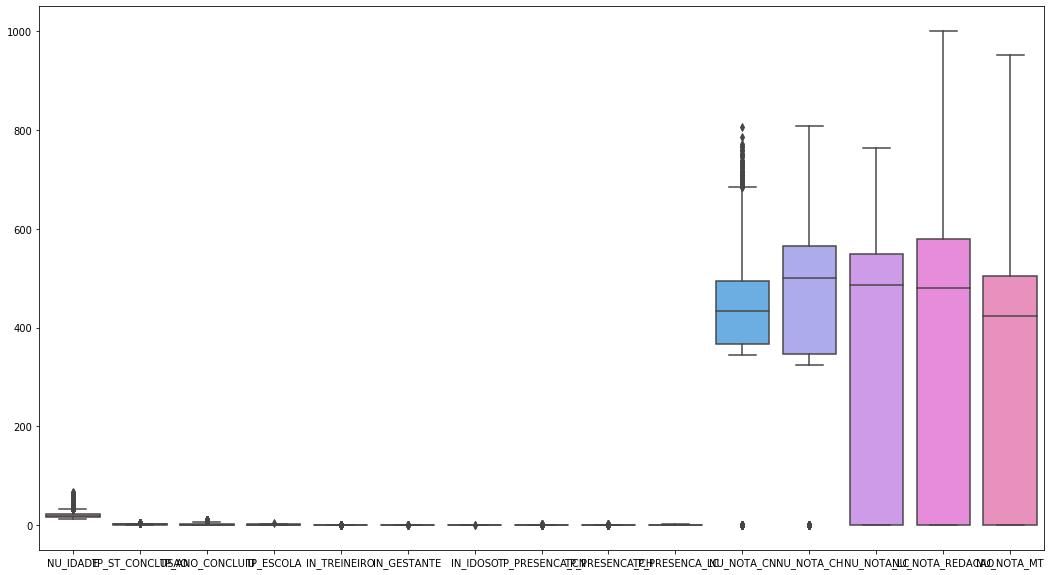

In [42]:
plt.figure(figsize=(18,10))
sns.boxplot(data = base_treino21)

## 2.6 - Dados Redundantes

In [43]:
base_treino21.duplicated().sum()

0

## 2.7 - Remover Coluna de Número de Inscrição

In [44]:
# Lista todas as colunas
list(base_treino21)

['NU_INSCRICAO',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'IN_TREINEIRO',
 'IN_GESTANTE',
 'IN_IDOSO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'NU_NOTA_MT']

In [45]:
NU_INSCRICAO = base_treino21.NU_INSCRICAO  #salvar essa coluna caso seja necessário
base_treino21 = base_treino21.drop('NU_INSCRICAO', axis = 1)     #AXIS = 1 APAGA A COLUNA

In [46]:
base_treino21.shape

(13730, 16)

# 3.0  - EXPLORAÇÃO DOS DADOS

In [47]:
 base3 = base_treino21.copy()

In [ ]:
base3.shape

## 3.1 - Visualização de Estatísticas Básicas

In [ ]:
base3.head() 

In [ ]:
base3.describe()

In [ ]:
ass = []
cur = []
colunas = base3.iloc[:,2:16]
colunas['NU_IDADE'] = base3.iloc[:,0]
for i in range (colunas.shape[1]):
    ass.append(colunas.iloc[i].skew())
    cur.append(colunas.iloc[i].kurt())
ac = pd.DataFrame({"Assimetria" : ass, "Curtose" : cur})
ac = ac.set_index(colunas.columns)
ac

## 3.2 - Histogramas

In [ ]:
c = colunas.shape[1] #número de colunas
p = np.round(c/3) #quantidade de gráficos por linha, quero 3 colunas.

plt.figure(1,figsize=(18,18))
for g in range(c):
    plt.subplot(p,3,g+1)#linhas, colunas, nºdo grafico
    sns.distplot(colunas.iloc[:,g], hist = True, kde = True, bins = 10, color = 'blue',hist_kws={'edgecolor': 'black'})

## 3.3 - Análise das Variáveis com a Saída

In [ ]:
base3.columns

In [ ]:
#Qual a relação da idade com a nota de matemática?

plt.figure(figsize=(18,10))

x = base3.NU_IDADE
y = base3.NU_NOTA_MT

#Computando os valores e gerando o gráfico

m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Idade")
plt.ylabel("Número de gravidez")
plt.title("Idade x Número de gravidez")
plt.show()


In [ ]:
#Qual a relação do sexo com a nota de matemática?
plt.figure(figsize=(18,10))

x = base3.TP_SEXO
y = base3.NU_NOTA_MT

#Computando os valores e gerando o gráfico

sns.barplot(x,y, ci=None)
plt.xticks(rotation=0);

In [ ]:
#Qual a relação do ano de conclusão com a nota de matemática?
plt.figure(figsize=(18,10))

x = base3.TP_ST_CONCLUSAO
y = base3.NU_NOTA_MT

#Computando os valores e gerando o gráfico

sns.barplot(x,y, ci=None)
plt.xticks(rotation=0);

In [ ]:
#Qual a relação do ano de conclusão com a nota de matemática?
plt.figure(figsize=(18,10))

x = base3.TP_ANO_CONCLUIU
y = base3.NU_NOTA_MT

#Computando os valores e gerando o gráfico

sns.barplot(x,y, ci=None)
plt.xticks(rotation=0);

In [ ]:
#Qual a relação do tipo de escola com a nota de matemática?
plt.figure(figsize=(18,10))

x = base3.TP_ESCOLA
y = base3.NU_NOTA_MT

#Computando os valores e gerando o gráfico

sns.barplot(x,y, ci=None)
plt.xticks(rotation=0);

In [ ]:
#Qual a relação dos treineiros com a nota de matemática?
plt.figure(figsize=(18,10))

x = base3.IN_TREINEIRO
y = base3.NU_NOTA_MT

#Computando os valores e gerando o gráfico

sns.barplot(x,y, ci=None)
plt.xticks(rotation=0);

In [ ]:
#Qual a relação das gestantes com a nota de matemática?
plt.figure(figsize=(18,10))

x = base3.IN_GESTANTE
y = base3.NU_NOTA_MT

#Computando os valores e gerando o gráfico

sns.barplot(x,y, ci=None)
plt.xticks(rotation=0);

In [ ]:
#Qual a relação dos idosos com a nota de matemática?
plt.figure(figsize=(18,10))

x = base3.IN_IDOSO
y = base3.NU_NOTA_MT

#Computando os valores e gerando o gráfico

sns.barplot(x,y, ci=None)
plt.xticks(rotation=0);

In [ ]:
#Qual a relação das notas de CN com a nota de matemática?
plt.figure(figsize=(18,10))

x = base3.NU_NOTA_CN
y = base3.NU_NOTA_MT

#Computando os valores e gerando o gráfico

m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("NU_NOTA_CN")
plt.ylabel("NU_NOTA_MT")
plt.title("")
plt.show()

In [ ]:
#Qual a relação das notas de CH com a nota de matemática?
plt.figure(figsize=(18,10))

x = base3.NU_NOTA_CH
y = base3.NU_NOTA_MT

#Computando os valores e gerando o gráfico

m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("NU_NOTA_CH")
plt.ylabel("NU_NOTA_MT")
plt.title("")
plt.show()

In [ ]:
#Qual a relação das notas de LC com a nota de matemática?
plt.figure(figsize=(18,10))

x = base3.NU_NOTA_LC
y = base3.NU_NOTA_MT

#Computando os valores e gerando o gráfico

m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("NU_NOTA_LC")
plt.ylabel("NU_NOTA_MT")
plt.title("")
plt.show()

In [ ]:
#Qual a relação das notas de redação com a nota de matemática?
plt.figure(figsize=(18,10))

x = base3.NU_NOTA_REDACAO
y = base3.NU_NOTA_MT

#Computando os valores e gerando o gráfico

m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("NU_NOTA_REDACAO")
plt.ylabel("NU_NOTA_MT")
plt.title("")
plt.show()

## 3.4 - Correlação

In [ ]:
base3.TP_SEXO.astype('category')

In [ ]:
base3.dtypes

In [ ]:
# Identificando a correlação entre as variáveis em geral
# Correlação não implica causalidade
corr = base3.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, square=True, annot=True, annot_kws={"size": 10},  vmin=-1, vmax=1);

In [ ]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
base3.corr()

In [ ]:
plt.figure(figsize=(10,6))
k = 6 #números de variáveis parra a correlação
cols = corr.nlargest(k, 'NU_NOTA_MT')['NU_NOTA_MT'].index
cm = np.corrcoef(base3[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## 3.5 - Gráfico de Dispersão Entre as Variáveis Mais Correlacionadas.

In [ ]:
sns.pairplot(base3[cols])
#kind="reg"
#height = 5.0
plt.show();

# 4.0 - MODELAGEM DOS DADOS

In [48]:
base4 = base3.copy()

In [49]:
base4.shape

(13730, 16)

In [50]:
base4.head()

,NU_IDADE,TP_SEXO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT
0,24,M,1,4,1,0,0,0,1,1,1,436.3,495.4,581.2,520.0,399.4
1,17,F,2,0,2,0,0,0,1,1,1,474.5,544.1,599.0,580.0,459.8
2,21,F,3,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,25,F,1,9,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,28,M,1,4,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


## 4.1 - Remover colunas desnecessárias.

In [51]:
#Remover coluna da base de dados
base4 = base4.drop('TP_PRESENCA_CN', axis = 1) #axis =1 significa a coluna toda
base4 = base4.drop('IN_GESTANTE', axis = 1) #axis =1 significa a coluna toda
base4 = base4.drop('IN_IDOSO', axis = 1) #axis =1 significa a coluna toda

In [52]:
base4.shape

(13730, 13)

In [53]:
base4.head()

,NU_IDADE,TP_SEXO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT
0,24,M,1,4,1,0,1,1,436.3,495.4,581.2,520.0,399.4
1,17,F,2,0,2,0,1,1,474.5,544.1,599.0,580.0,459.8
2,21,F,3,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0
3,25,F,1,9,1,0,0,0,0.0,0.0,0.0,0.0,0.0
4,28,M,1,4,1,0,0,0,0.0,0.0,0.0,0.0,0.0


## 4.2 - Separar a Base de Dados em Atributos e Classes

In [54]:
#SEPARA EM ATRIBUTOS E CLASSES
previsores = base4.iloc[:,0:12]  #.values converte para valores numpy 
classe = base4.iloc[:,12]        #.values converte para valores numpy 

## 4.3 - Transformar Atributos Categóricos para Numéricos

In [55]:
#transformar atributos categoricos para numericos

labelEncoder = LabelEncoder() 

previsores.iloc[:,1] = labelEncoder.fit_transform(previsores.iloc[:,1])


# 0 0 0 4
# 2 0 1 0
# 3 0 0 1

In [56]:
#Atributos  -- DUMMY

onehotencoder = OneHotEncoder(categorical_features = [1,2,3,4,5,6,7])
previsores = onehotencoder.fit_transform(previsores).toarray()

#Gera varius outros atributos com essas caracteristicas
#atr 1  1 0 0
#atr 2  0 1 0
#atr 3  0 0 1

C:\Users\marcu\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\marcu\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [57]:
previsores.shape

(13730, 34)

In [58]:
previsores2 = pd.DataFrame(previsores)
previsores2

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,24.0,436.3,495.4,581.2,520.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,17.0,474.5,544.1,599.0,580.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,20.0,438.2,419.7,394.5,440.0
13726,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,33.0,423.8,557.9,533.0,560.0
13727,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,15.0,460.5,528.9,569.3,600.0
13728,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,36.0,422.5,621.7,569.0,460.0


##  4.6 - Dividir Base de Dados em Treino e Teste

In [59]:
#DIVIDIR DADOS EM TREINAMENTO E TESTE
#Realizar testes com uma divisão 80% treino e 20% teste (base de dados pequena)
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

#x sao as entradas
#y sao as saidas

##  4.7 - Normalizar Variáveis

### 4.7.4 - Box - Cox

 A principal vantagem das transformações de Box-Cox é que elas normalizam idealmente a variável escolhida. Assim, evitam a necessidade de tentar aleatoriamente diferentes transformações e automatizar o processo de transformação de dados.

In [60]:
x_treino_t = x_treino.copy()
x_treino_t[:,29] = boxcox(x_treino_t[:,29] + 1)[0]

x_teste_t = x_teste.copy()
x_teste_t[:,29] = boxcox(x_teste_t[:,29] + 1)[0]

In [61]:
x_treino_t[:,30] = boxcox(x_treino_t[:,30] + 1)[0]

x_teste_t = x_teste.copy()
x_teste_t[:,30] = boxcox(x_teste_t[:,30] + 1)[0]

In [62]:
x_treino_t[:,31] = boxcox(x_treino_t[:,31] + 1)[0]

x_teste_t = x_teste.copy()
x_teste_t[:,31] = boxcox(x_teste_t[:,31] + 1)[0]

In [63]:
x_treino_t[:,32] = boxcox(x_treino_t[:,32] + 1)[0]

x_teste_t = x_teste.copy()
x_teste_t[:,32] = boxcox(x_teste_t[:,32] + 1)[0]

In [64]:
x_treino_t[:,33] = boxcox(x_treino_t[:,33] + 1)[0]

x_teste_t = x_teste.copy()
x_teste_t[:,33] = boxcox(x_teste_t[:,33] + 1)[0]

### 4.7.4 - Polinomios

Uma maneira padrão de enriquecer nosso conjunto de recursos é gerar polinômios. A expansão polinomial cria interações entre os recursos, bem como cria poderes (por exemplo, quadrado de um recurso). Dessa forma, introduzimos uma dimensão não linear em nosso conjunto de dados, o que pode melhorar o poder preditivo de nosso modelo.

Usar box-cox (gera o x_treino_t)
Usar MIN MAX (gera o x_treino_t_n)

In [65]:
#NORMALIZADOR DE VARIAVEIS MIN MAX
normalizador = MinMaxScaler(feature_range=(0,1)) #NORMALIZAÇÃO DOS VALORES 

x_treino_t_n = normalizador.fit_transform(x_treino_t)#usar para o fit o x transormado pelo box-cox
x_teste_t_n = normalizador.transform(x_teste_t) #usar para o fit o x transormado pelo box-cox

In [66]:
poly = PolynomialFeatures(degree=2).fit(x_treino_t) #treino com a normalização box-cox

x_treino_poly = poly.transform(x_treino_t_n) #transforma os dados normalizados pelo min-max

x_teste_poly = poly.transform(x_teste_t_n)   #transforma os dados normalizados pelo min-max

In [67]:
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x0 x13', 'x0 x14', 'x0 x15', 'x0 x16', 'x0 x17', 'x0 x18', 'x0 x19', 'x0 x20', 'x0 x21', 'x0 x22', 'x0 x23', 'x0 x24', 'x0 x25', 'x0 x26', 'x0 x27', 'x0 x28', 'x0 x29', 'x0 x30', 'x0 x31', 'x0 x32', 'x0 x33', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x1 x13', 'x1 x14', 'x1 x15', 'x1 x16', 'x1 x17', 'x1 x18', 'x1 x19', 'x1 x20', 'x1 x21', 'x1 x22', 'x1 x23', 'x1 x24', 'x1 x25', 'x1 x26', 'x1 x27', 'x1 x28', 'x1 x29', 'x1 x30', 'x1 x31', 'x1 x32', 'x1 x33', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x2 x13', 'x2 x1

##  4.8 - Seleção de Atributos
Usando abordagem estatística univariada.

Usaremos o teste do qui-quadrado para a seleção de recursos. Isso significa que temos que escolher o número de recursos que queremos no modelo. Por exemplo, se quisermos ter três recursos em nosso modelo, o método selecionará os três recursos com χ2 mais alto.

Essa Seleção será feita após a construção do modelo.

# 5.0 - MODELO

In [ ]:
base5 = base4.copy()

## 5.0 Reset de Variáveis
Caso ocorra algo com as variaveis de teste e treino basta resetá-las aqui.

In [ ]:
#modelo 1 - sem polinomios(muito pesado para RNA)
x_treino_t_n1 =x_treino_t_n.copy()
x_tste_t_n1 =x_teste_t_n.copy()
y_treino1 = y_treino.copy()
y_teste1 = y_teste.copy()

In [88]:
#modelo 2
x_treino_poly2 =x_treino_poly.copy()
x_teste_poly2 =x_teste_poly.copy()
y_treino2 = y_treino.copy()
y_teste2 = y_teste.copy()

In [ ]:
#modelo 3
x_treino_poly3 =x_treino_poly.copy()
x_tste_poly3 =x_teste_poly.copy()
y_treino3 = y_treino.copy()
y_teste3= y_teste.copy()

## 5.1 Modelo 1 - RNA

### 5.1 - Criar Modelo Sequencial

Funções de ativação:

1. relu function
2. sigmoid function     # Classificação Binária
3. softmax function     # Classificação Categórica
4. tanh function
5. softplus function    #softplus(x) = log(exp(x) + 1).
6. softsign function    #softsign(x) = x / (abs(x) + 1).
7. selu function
8. elu function
9. exponential function

In [ ]:
x_treino_t_n1.shape

In [ ]:
# Criando o modelo regressivo usando KERAS

modelo1 = Sequential()  #uma camada apos a outra

modelo1.add(Dense(units = 100, activation = 'relu', input_dim = 34))#camadas oculta1 (41 neurônios)+ camda de entrada(903)
modelo1.add(Dropout(0.3))

modelo1.add(Dense(units = 100,  activation = 'relu'))# camada de oculta 2 (41)
modelo1.add(Dropout(0.3))

modelo1.add(Dense(units = 1, activation = 'linear')) #camada de saida (1 saídas)

In [ ]:
# Ver Modelo
modelo1.summary()

### 5.2 - Otimizador

#### Otimizadores disponíveis:                                 
1. SGD                              
2. RMSprop                          
3. Adam                             
4. Adadelta                       
5. Adagrad                          
6. Adamax                            
7. Nadam                             
8. Ftrl      

<a href="https://keras.io/api/optimizers/">optimezers/</a>

#### Metrics 
Regression metrics

1. MeanSquaredError class
2. RootMeanSquaredError class
3. MeanAbsoluteError class
4. MeanAbsolutePercentageError class
5. MeanSquaredLogarithmicError class
6. CosineSimilarity class
7. LogCoshError class


<a href="https://keras.io/api/metrics/">metrics/</a>

#### Loss = Erro para o treinamento.
Regression losses

1.  mean_squared_error function
2.  mean_absolute_error function
3.  mean_absolute_percentage_error function
4.  mean_squared_logarithmic_error function
5. cosine_similarity function
6. huber function
7. log_cosh function

<a href="https://keras.io/api/losses/">losses/</a>

In [ ]:
modelo1.compile(optimizer = 'RMSprop',
               loss = 'mean_squared_error',
               metrics = ['mean_squared_error'])

### 5.3 - Treino

In [ ]:
# Treinando o modelo
historico1 = modelo1.fit(x_treino_t_n1, 
                       y_treino1, 
                       batch_size = 512, 
                       epochs = 2000) #preco_real é a variavel de exemplo que queremos prever
#batch_size=64
#validation_split=0.2

loss: 4666.8156 - mean_squared_error: 4666.8154

### 5.4 - Imagem do Treino

In [ ]:
historico1.history.keys()
plt.plot(historico1.history['loss'])
plt.plot(historico1.history['mean_squared_error'])

### 5.5 Seleção de Atributos
Usando abordagem estatística univariada.

#### Validação Cruzada

In [ ]:
# Criando o modelo regressor usando KERAS

def criar_rede():
    modelo1 = Sequential()  #uma camada apos a outra

    modelo1.add(Dense(units = 100, activation = 'relu', input_dim = 34))#camadas oculta1 (41 neurônios)+ camda de entrada(903)
    modelo1.add(Dropout(0.3))

    modelo1.add(Dense(units = 100,  activation = 'relu'))# camada de oculta 2 (41)
    modelo1.add(Dropout(0.3))

    modelo1.add(Dense(units = 1, activation = 'linear')) #camada de saida (1 saídas)
    
    modelo1.compile(loss = 'mean_absolute_error',
                   optimizer = 'RMSprop',
                   metrics = ['mean_absolute_error'])
    
    return modelo1

In [ ]:
modelo1 = KerasRegressor(build_fn = criar_rede,
                         epochs = 2000,
                         batch_size = 512)


resultados1 = cross_val_score(estimator = modelo1,
                             X = x_treino_t_n1, 
                             y = y_treino1,
                             cv = 10, 
                             scoring = 'neg_mean_absolute_error')

In [ ]:
media = resultados1.mean()
std = resultados1.std()
print('Média: ', media)
print('Std: ', std)

In [ ]:
melhor_resultado1 = media

#### Obter pontuação usando modelos com seleção de recursos

In [ ]:
# Criando o modelo regressor usando KERAS

def criar_rede2(camada_entrada):
    modelo1 = Sequential()  #uma camada apos a outra

    modelo1.add(Dense(units = 14, activation = 'relu', input_dim = camada_entrada))#camadas oculta1 (41 neurônios)+ camda de entrada(100)
    modelo1.add(Dropout(0.3))

    modelo1.add(Dense(units = 14,  activation = 'relu'))# camada de oculta 2 (100)
    modelo1.add(Dropout(0.3))

    modelo1.add(Dense(units = 1, activation = 'linear')) #camada de saida (1 saídas)
    
    modelo1.compile(loss = 'mean_absolute_error',
                   optimizer = 'RMSprop',
                   metrics = ['mean_absolute_error'])
    
    return modelo1

In [ ]:
for i in range(1, x_treino_t_n1.shape[1]+1, 1):
    # Select i atributos
    select = SelectKBest(score_func=f_regression, k=i) #chi2 = qui-quadrado
    select.fit(x_treino_t_n1, y_treino1)
    x_treino_t_n1_selected = select.transform(x_treino_t_n1)

    # Modelo com i atributos selecionados
   
    
    modelo1 = KerasRegressor(build_fn = criar_rede2,
                             camada_entrada = x_treino_t_n1_selected.shape[1],
                             epochs = 1000,
                             batch_size = 1730)
  
   
    modelo1.fit(x_treino_t_n1_selected, y_treino1)
    resultados1 = cross_val_score(modelo1, x_treino_t_n1_selected, y_treino1, cv=10)
    media = resultados1.mean()
    std = resultados1.std()
    print('Média: ', media)
    print('Std: ', std)
    print('CV acuracia: ', media, '+/- ', std)
    
    # Salvar resultados se melhorar a pontuação
    if np.mean(resultados1) > melhor_resultado1:
        melhor_resultado1 = media
        melhor_std1 = std
        k_atributos_melhor_resultado1 = i
    elif media == melhor_resultado1:
        if std <  melhor_std1:
            melhor_resultado1 = media
            melhor_std1 = std
            k_atributos_melhor_resultado1 = i

In [ ]:
print('Número de atributos com melhor pontuação: ', k_atributos_melhor_resultado1)

#### Selecionar Atributos

In [ ]:
select = SelectKBest(score_func = chi2, k = k_atributos_melhor_resultado)
select.fit(x_treino_poly, y_treino)
x_treino_poly_selected = select.transform(x_treino_poly)

#### Treinar Modelo

In [ ]:
modelo1 = Sequential()  #uma camada apos a outra

modelo1.add(Dense(units = 100, activation = 'relu', input_dim = 34))#camadas oculta1 (41 neurônios)+ camda de entrada(903)
modelo1.add(Dropout(0.3))

modelo1.add(Dense(units = 100,  activation = 'relu'))# camada de oculta 2 (41)
modelo1.add(Dropout(0.3))

modelo1.add(Dense(units = 1, activation = 'linear')) #camada de saida (1 saídas)
    
modelo1.compile(loss = 'mean_absolute_error',
                optimizer = 'RMSprop',
                metrics = ['mean_absolute_error'])


modelo1.fit(x_treino_t_n1,
            y_treino1,
            batch_size = 512,
            epochs = 5000)

#### Resultados


In [ ]:
resultados = cross_val_score(modelo, 
                         x_treino_poly_selected, 
                         y_treino, 
                         cv=10,
                         n_jobs= -1,
                         scoring = 'mean_squared_error')

#### Curva de Aprendizado

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    
    plt.title(title)
    
    if ylim is not None:
        
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            X, 
                                                            y, 
                                                            cv=cv, 
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
title = "Curva de Aprendizado (RNA)"
cv = 2
plot_learning_curve(modelo1, 
                    title, 
                    x_treino_t_n1,
                    y_treino1, 
                    ylim = (0, 70), 
                    cv = cv);

#### Curva de Validação

In [ ]:
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, 
                          cv=None,train_sizes=np.linspace(.1, 1.0, 5)):
    
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)

In [ ]:
title = 'Curva de Validação (RNA)'
param_name = 'optimizer'
param_range = ['RMSprop', 'adam'] 
cv = 2
plot_validation_curve(estimator=modelo1, 
                      title = title, 
                      X = x_treino_t_n1, 
                      y = y_treino1, 
                      param_name = param_name, 
                      ylim = (0, 70), 
                      param_range = param_range);

#### Fazer a mesma transformação com os dados de teste.

In [ ]:
base_teste1 = base_teste.copy()

In [ ]:
base_teste1 = base_teste1.drop(columns = ['CO_UF_RESIDENCIA'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['SG_UF_RESIDENCIA'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['TP_COR_RACA'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['TP_NACIONALIDADE'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['IN_BAIXA_VISAO'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['IN_CEGUEIRA'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['IN_SURDEZ'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['IN_DISLEXIA'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['IN_DISCALCULIA'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['IN_SABATISTA'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['CO_PROVA_CN'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['CO_PROVA_CH'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['CO_PROVA_LC'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['CO_PROVA_MT'], axis = 1)     #AXIS = 1 APAGA A COLUNA
                                   
base_teste1 = base_teste1.drop(columns = ['TP_LINGUA'], axis = 1)     #AXIS = 1 APAGA A COLUNA 

base_teste1 = base_teste1.drop(columns = ['TP_STATUS_REDACAO'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['NU_NOTA_COMP1'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['NU_NOTA_COMP2'], axis = 1)     #AXIS = 1 APAGA A COLUNA
                                   
base_teste1 = base_teste1.drop(columns = ['NU_NOTA_COMP3'], axis = 1)     #AXIS = 1 APAGA A COLUNA 

base_teste1 = base_teste1.drop(columns = ['NU_NOTA_COMP4'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['NU_NOTA_COMP5'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['Q001'], axis = 1)     #AXIS = 1 APAGA A COLUNA
                                   
base_teste1 = base_teste1.drop(columns = ['Q002'], axis = 1)     #AXIS = 1 APAGA A COLUNA 

base_teste1 = base_teste1.drop(columns = ['Q006'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['Q024'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['Q025'], axis = 1)     #AXIS = 1 APAGA A COLUNA
                                   
base_teste1 = base_teste1.drop(columns = ['Q026'], axis = 1)     #AXIS = 1 APAGA A COLUNA 

base_teste1 = base_teste1.drop(columns = ['Q027'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['Q047'], axis = 1)     #AXIS = 1 APAGA A COLUNA

In [ ]:
base_teste1 = base_teste1.drop(columns = ['TP_ENSINO'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['TP_DEPENDENCIA_ADM_ESC'], axis = 1)     #AXIS = 1 APAGA A COLUNA

In [ ]:
presentes  = base_teste1.iloc[:,9:]

In [ ]:
presentes.loc[(presentes.NU_NOTA_CH.isnull())].head(10)

In [ ]:
base_teste1 = base_teste1.fillna(0)

In [ ]:
base_teste1.duplicated().sum()

#####  Remover Coluna de Número de Inscrição

In [ ]:
NU_INSCRICAO_teste = base_teste1.NU_INSCRICAO  #salvar essa coluna caso seja necessário
base_teste1 = base_teste1.drop('NU_INSCRICAO', axis = 1)     #AXIS = 1 APAGA A COLUNA

In [ ]:
base_teste1.shape

In [ ]:
#Remover coluna da base de dados
base_teste1 = base_teste1.drop('TP_PRESENCA_CN', axis = 1) #axis =1 significa a coluna toda
base_teste1 = base_teste1.drop('IN_GESTANTE', axis = 1) #axis =1 significa a coluna toda
base_teste1 = base_teste1.drop('IN_IDOSO', axis = 1) #axis =1 significa a coluna toda

In [ ]:
base_teste1.iloc[:,1] = labelEncoder.transform(base_teste1.iloc[:,1])

In [ ]:
base_teste1 = onehotencoder.transform(base_teste1).toarray()

In [ ]:
base_teste1[:,29] = boxcox(base_teste1[:,29] + 1)[0]

base_teste1[:,30] = boxcox(base_teste1[:,30] + 1)[0]

base_teste1[:,31] = boxcox(base_teste1[:,31] + 1)[0]

base_teste1[:,32] = boxcox(base_teste1[:,32] + 1)[0]

base_teste1[:,33] = boxcox(base_teste1[:,33] + 1)[0]

In [ ]:
#NORMALIZADOR DE VARIAVEIS MIN MAX

base_teste1 = normalizador.transform(base_teste1) #usar para o fit o x transormado pelo box-cox

In [ ]:
base_teste1.shape

##### Verificando a exatidão no modelo nos dados de teste

In [ ]:
previsao = modelo1.predict(x_teste_t_n)

In [ ]:
previsao

In [ ]:
print(y_teste1.mean()) #preco_real -> exemplo de saída
print('Média: ', previsao.mean())
print('Std: ', previsao.std())

In [ ]:
print('MAE:', mean_absolute_error(y_teste1, previsao).round(8)  )
print('MSE:', mean_squared_error(y_teste1, previsao).round(8) )  
print('RMSE:', np.sqrt(mean_squared_error(y_teste1, previsao)).round(8))

In [ ]:
resultado = modelo1.evaluate(x_teste_t_n, y_teste1)#usando ferramentas do keras
resultado

## 5.2 Modelo 1 - RandomForest

In [69]:
# Criando o modelo preditivo usando SCIKIT-LEARN
modelo2 = RandomForestRegressor(criterion='mae',
                                max_depth=8, 
                                max_leaf_nodes=None,
                                min_impurity_split=None,
                                min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0,
                                n_estimators= 500,
                                n_jobs=-1,
                                random_state=0,
                                verbose=0,
                                warm_start=False)

In [70]:
# Treinando o modelo
modelo2.fit(x_treino_poly2, y_treino2)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

## 1.1 Seleção de Atributos
Usando abordagem estatística univariada.

In [ ]:
resultados = cross_val_score(modelo2,
                             x_treino_poly2, 
                             y_treino2, 
                             cv=10,
                             n_jobs= -1)

In [ ]:
media = resultados.mean()
std = resultados.std()
print('Média: ', media)
print('Std: ', std)

In [ ]:
melhor_resultado = media

### Obter pontuação usando modelos com seleção de recursos

In [ ]:
for i in range(1, x_treino_poly.shape[1]+1, 1):
    # Select i atributos
    select = SelectKBest(score_func=chi2, k=i) #chi2 = qui-quadrado
    select.fit(x_treino_poly, y_treino)
    x_treino_poly_selected = select.transform(x_treino_poly)

    # Modelo com i atributos selecionados
    modelo.fit(x_treino_poly_selected, y_treino)
    resultados = cross_val_score(modelo, x_treino_poly_selected, y_treino, cv=10)
    media = resultados.mean()
    std = resultados.std()
    print('Média: ', media)
    print('Std: ', desvio)
    print('CV acuracia: ', media, '+/- ', std)
    
    # Salvar resultados se melhorar a pontuação
    if np.mean(resultados) > melhor_resultado:
        melhor_resultado = media
        melhor_std = std
        k_atributos_melhor_resultado = i
    elif media == melhor_resultado:
        if std <  melhor_std:
            melhor_resultado = media
            melhor_std = std
            k_atributos_melhor_resultado = i

In [ ]:
print('Número de atributos com melhor pontuação: ', k_atributos_melhor_resultado)

### Selecionar Atributos

In [ ]:
select = SelectKBest(score_func = chi2, k = k_atributos_melhor_resultado)
select.fit(x_treino_poly, y_treino)
x_treino_poly_selected = select.transform(x_treino_poly)

### Treinar Modelo

In [ ]:
modelo = RandomForestRegressor(criterion='mae',
                               max_depth=8, 
                               max_leaf_nodes=None,
                               min_impurity_split=None,
                               min_samples_leaf=1,
                               min_samples_split=2,
                               min_weight_fraction_leaf=0.0,
                               n_estimators= 500,
                               n_jobs=-1,
                               random_state=0,
                               verbose=0,
                               warm_start=False)

modelo.fit(x_treino_poly_selected, y_treino)

### Resultados


In [ ]:
resultados = cross_val_score(modelo, 
                         x_treino_poly_selected, 
                         y_treino, 
                         cv=10,
                         n_jobs= -1,
                         scoring = 'mean_squared_error')

## 5.4 Predição
Fazer a mesma transformação com os dados de teste.

In [71]:
base_teste1 = base_teste.copy()

In [72]:
base_teste1 = base_teste1.drop(columns = ['CO_UF_RESIDENCIA'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['SG_UF_RESIDENCIA'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['TP_COR_RACA'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['TP_NACIONALIDADE'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['IN_BAIXA_VISAO'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['IN_CEGUEIRA'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['IN_SURDEZ'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['IN_DISLEXIA'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['IN_DISCALCULIA'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['IN_SABATISTA'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['CO_PROVA_CN'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['CO_PROVA_CH'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['CO_PROVA_LC'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['CO_PROVA_MT'], axis = 1)     #AXIS = 1 APAGA A COLUNA
                                   
base_teste1 = base_teste1.drop(columns = ['TP_LINGUA'], axis = 1)     #AXIS = 1 APAGA A COLUNA 

base_teste1 = base_teste1.drop(columns = ['TP_STATUS_REDACAO'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['NU_NOTA_COMP1'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['NU_NOTA_COMP2'], axis = 1)     #AXIS = 1 APAGA A COLUNA
                                   
base_teste1 = base_teste1.drop(columns = ['NU_NOTA_COMP3'], axis = 1)     #AXIS = 1 APAGA A COLUNA 

base_teste1 = base_teste1.drop(columns = ['NU_NOTA_COMP4'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['NU_NOTA_COMP5'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['Q001'], axis = 1)     #AXIS = 1 APAGA A COLUNA
                                   
base_teste1 = base_teste1.drop(columns = ['Q002'], axis = 1)     #AXIS = 1 APAGA A COLUNA 

base_teste1 = base_teste1.drop(columns = ['Q006'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['Q024'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['Q025'], axis = 1)     #AXIS = 1 APAGA A COLUNA
                                   
base_teste1 = base_teste1.drop(columns = ['Q026'], axis = 1)     #AXIS = 1 APAGA A COLUNA 

base_teste1 = base_teste1.drop(columns = ['Q027'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['Q047'], axis = 1)     #AXIS = 1 APAGA A COLUNA

In [73]:
base_teste1 = base_teste1.drop(columns = ['TP_ENSINO'], axis = 1)     #AXIS = 1 APAGA A COLUNA

base_teste1 = base_teste1.drop(columns = ['TP_DEPENDENCIA_ADM_ESC'], axis = 1)     #AXIS = 1 APAGA A COLUNA

In [74]:
presentes  = base_teste1.iloc[:,9:]

In [75]:
presentes.loc[(presentes.NU_NOTA_CH.isnull())].head(10)

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
3,0,0,0,NaN,NaN,NaN,NaN
10,0,0,0,NaN,NaN,NaN,NaN
11,0,0,0,NaN,NaN,NaN,NaN
16,0,0,0,NaN,NaN,NaN,NaN
17,0,0,0,NaN,NaN,NaN,NaN
18,0,0,0,NaN,NaN,NaN,NaN
22,0,0,0,NaN,NaN,NaN,NaN
29,0,0,0,NaN,NaN,NaN,NaN
30,0,0,0,NaN,NaN,NaN,NaN
44,0,0,0,NaN,NaN,NaN,NaN


In [76]:
base_teste1 = base_teste1.fillna(0)

In [77]:
base_teste1.duplicated().sum()

0

#####  Remover Coluna de Número de Inscrição

In [78]:
NU_INSCRICAO_teste = base_teste1.NU_INSCRICAO  #salvar essa coluna caso seja necessário
base_teste1 = base_teste1.drop('NU_INSCRICAO', axis = 1)     #AXIS = 1 APAGA A COLUNA

In [79]:
base_teste1.shape

(4576, 15)

In [80]:
#Remover coluna da base de dados
base_teste1 = base_teste1.drop('TP_PRESENCA_CN', axis = 1) #axis =1 significa a coluna toda
base_teste1 = base_teste1.drop('IN_GESTANTE', axis = 1) #axis =1 significa a coluna toda
base_teste1 = base_teste1.drop('IN_IDOSO', axis = 1) #axis =1 significa a coluna toda

In [81]:
base_teste1.iloc[:,1] = labelEncoder.transform(base_teste1.iloc[:,1])

In [82]:
base_teste1 = onehotencoder.transform(base_teste1).toarray()

In [83]:
base_teste1[:,29] = boxcox(base_teste1[:,29] + 1)[0]

base_teste1[:,30] = boxcox(base_teste1[:,30] + 1)[0]

base_teste1[:,31] = boxcox(base_teste1[:,31] + 1)[0]

base_teste1[:,32] = boxcox(base_teste1[:,32] + 1)[0]

base_teste1[:,33] = boxcox(base_teste1[:,33] + 1)[0]

In [84]:
#NORMALIZADOR DE VARIAVEIS MIN MAX

base_teste1 = normalizador.transform(base_teste1) #usar para o fit o x transormado pelo box-cox

In [85]:
base_teste1 = poly.transform(base_teste1)   #transforma os dados normalizados pelo min-max

In [86]:
base_teste1.shape

(4576, 630)

##### Verificando a exatidão no modelo nos dados de teste

In [89]:
previsao = modelo2.predict(x_teste_poly2)

In [90]:
previsao

array([  0.    , 820.8333, 832.3534, ..., 794.1464, 794.4164, 831.6955])

In [91]:
print(y_teste2.mean()) #preco_real -> exemplo de saída
print('Média: ', previsao.mean())
print('Std: ', previsao.std())

359.1713522699683
Média:  604.0478610342311
Std:  359.4485821970989


In [92]:
print('MAE:', mean_absolute_error(y_teste2, previsao).round(8)  )
print('MSE:', mean_squared_error(y_teste2, previsao).round(8) )  
print('RMSE:', np.sqrt(mean_squared_error(y_teste2, previsao)).round(8))

MAE: 245.10365977
MSE: 88551.66065833
RMSE: 297.57631065


In [102]:
previsao2 = modelo2.predict(base_teste1)

In [103]:
previsao2

array([354.7923, 378.1378, 493.6883, ..., 565.5551, 388.04  ,   0.    ])

# SUBMISSÃO

In [104]:
submission = pd.DataFrame({ 'NU_INSCRICAO': NU_INSCRICAO_teste, 'NU_NOTA_MT': previsao2})

In [105]:
submission.to_csv("submission2.csv", index=False)

# Sucesso!!!
pontuação 90.83%

# 6.0 - SALVAR E CARREGAR MODELO TREINADO

## 6.1 - Salvando o Modelo

 #### Lembrete: 
 Salvar o Objeto de Normalização das Variáveis.
 
 Para que as novas entradas possam passar pelo mesmo processo.

### USANDO PICKLE

In [107]:
file_modelo2 = 'modelo2.sav'
file_labelEncoder = 'labelEncoder.sav'
file_onehotencoder = 'onehotencoder.sav'
file_normalizador = 'normalizador.sav'
file_poly = 'poly.sav'

pickle.dump(modelo2, open(file_modelo2, 'wb'))
pickle.dump(labelEncoder, open(file_labelEncoder, 'wb'))
pickle.dump(onehotencoder, open(file_onehotencoder, 'wb'))
pickle.dump(normalizador, open(file_normalizador, 'wb'))
pickle.dump(poly, open(file_poly, 'wb'))

## 6.2- Carregando o Modelo

### USANDO PICKLE

In [108]:
# Carregando o modelo e fazendo previsão com novos conjuntos de dados 
# (X_teste, Y_teste devem ser novos conjuntos de dados preparados com o procedimento de limpeza e transformação adequados)
loaded_model = pickle.load(open(file_modelo2, 'rb'))
resultado1 = loaded_model.predict(base_teste1)
print(resultado1)

[354.7923 378.1378 493.6883 ... 565.5551 388.04     0.    ]
